In [1]:
#!pip freeze > ../requests.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading data

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

# Preprocessing

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df[sensor_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [8]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [9]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [10]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [11]:
estacao_df.isna().sum()

data               0
Hora (Brasília)    0
chuva              0
dtype: int64

In [12]:
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [13]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [14]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [15]:
dados_df[dados_df['air_humidity_100'].isna()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31,2020-10-01 00:00:00,0.0
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30,2020-10-01 05:00:00,0.0
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30,2020-10-01 12:00:00,0.0
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30,2020-10-01 16:00:00,0.0
19,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37,2020-10-01 21:00:00,0.0
29,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19,2020-10-02 08:00:00,0.0


When data are NaN there is no rain. As most of the data are no rain, this lines can be dropped with no significant loss of information.  

In [16]:
dados_df.dropna(inplace=True)

In [17]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

# Descriptive Analyse
- The no-rain data shells the raining distribution (figure at left).
- In order to better see the distribution of raining data, the histogram is constructed ignoring the no-rain data (figure at right).

Text(0.5, 0, 'Rain')

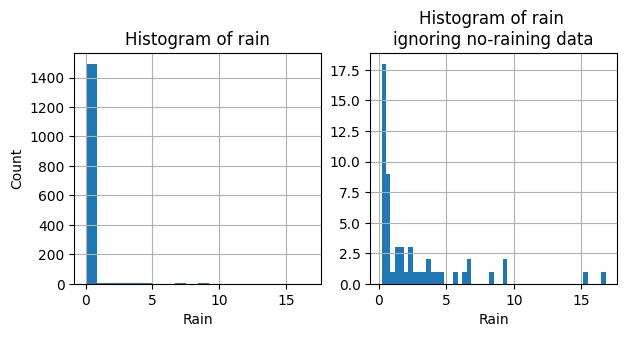

In [18]:
plt.subplots(1,2, figsize=(7,3))

plt.subplot(121)
dados_df.chuva.hist(bins=20)
plt.title('Histogram of rain')
plt.xlabel('Rain')
plt.ylabel('Count')

plt.subplot(122)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(bins=50)
plt.title('Histogram of rain \nignoring no-raining data')
plt.xlabel('Rain')

- The figure at left shows there is a small difference between the temperature of the enviroment and the sensor
- The figure at right shows that any time the board is resetted, the charge of the condensator starts at its higest value
- Also, at right, it can be seen that only a tiny variation in the slope if the charge informates about the rain. A further treatment must be done in this variable.

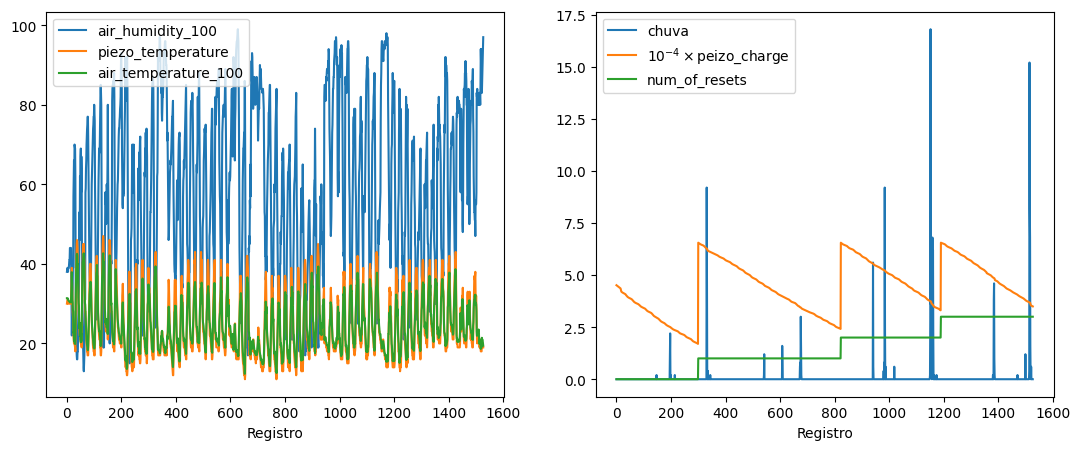

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(13,5))

plt.subplot(121)
ax1.plot(dados_df[['air_humidity_100']], label='air_humidity_100')
ax1.plot(dados_df[['piezo_temperature']], label='piezo_temperature')
ax1.plot(dados_df[['air_temperature_100']], label='air_temperature_100')
plt.xlabel('Registro')
plt.legend()

plt.subplot(122)
ax2.plot(dados_df[['chuva']], label='chuva')
ax2.plot(dados_df[['piezo_charge']]/10000, label=r'$10^{-4}\times $peizo_charge')
ax2.plot(dados_df[['num_of_resets']], label='num_of_resets')
plt.xlabel('Registro')
plt.legend()


# Feature engeniering
In order to gain insight at how the sensor captates the information about the rain's behavior, is needed to perform some transformations.
- Most of infomation of the fluctuations of the signal is in the difference between two consecutive registres.
- The rooth squared mean $rms$ of the differences drift the signal to $0$


In [20]:
# Warning! you must be carefull to run this cell twice without restarting the kernell
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)
rms = np.sqrt(dados_df.dif_charge.apply(lambda x: x**2).mean())
dados_df['dif_charge'] = (dados_df['dif_charge']-rms)#*5
#rms

- Rescaling helps the interpretation.
- Sucescively approximations shown there is a shift 

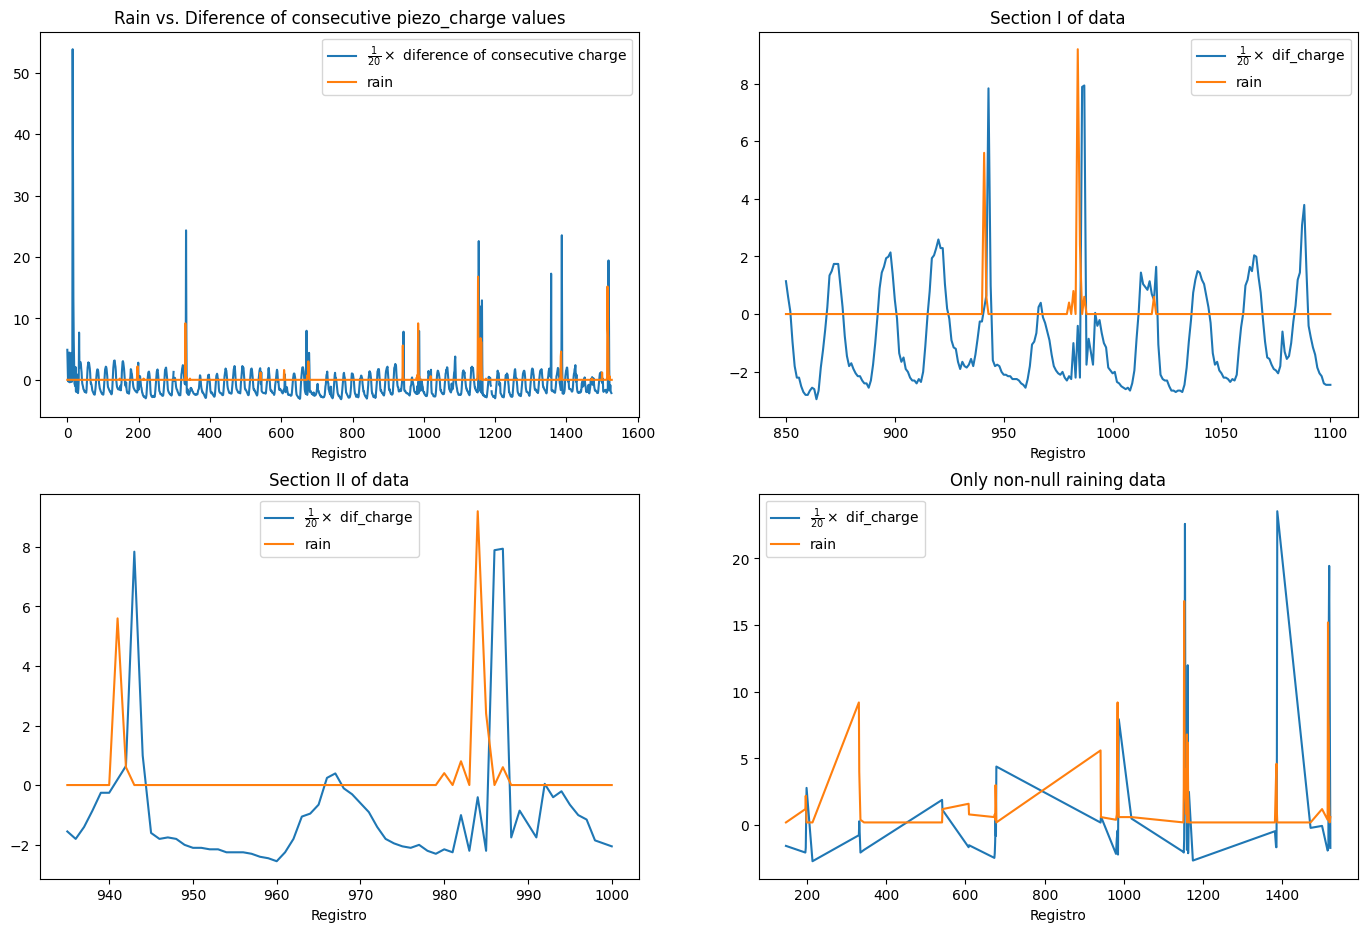

In [21]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize=(17,11))

plt.subplot(221)
ax1[0].plot(dados_df[['dif_charge']]/20, label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1[0].plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(222)
ax1[1].plot(dados_df.loc[850:1100,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1[1].plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section I of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(223)
ax2[0].plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[0].plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(224)
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


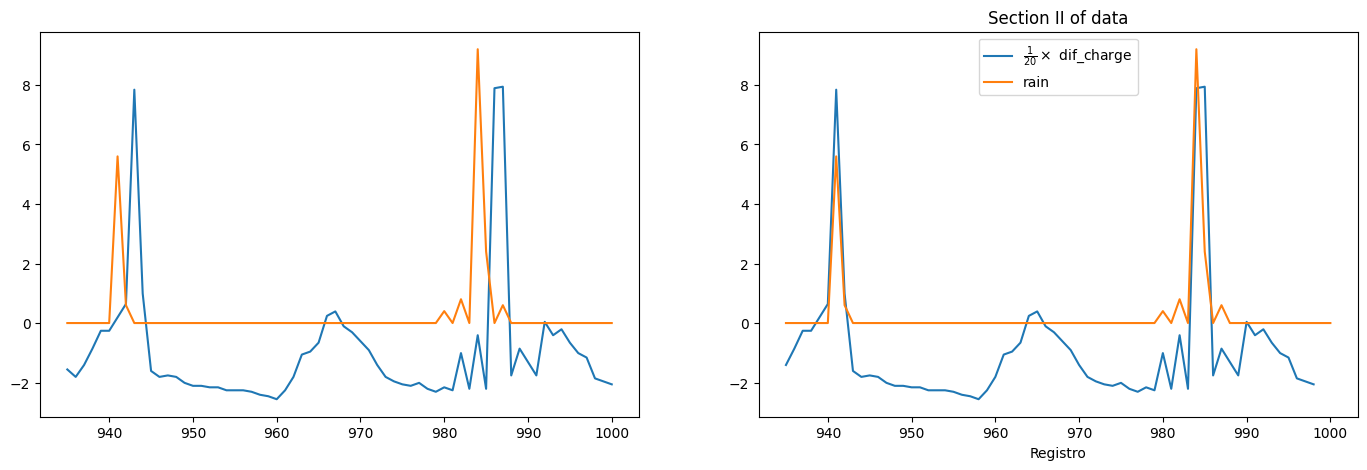

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,5))

ax1.plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1.plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

ax2.plot(dados_df.loc[935:1000,['dif_charge']].shift(-2)/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

In [23]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1).shift(-2)#.apply(np.log)
dados_df.dropna(inplace=True)

#dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])
#rms = np.sqrt(dados_df.dif_charge.apply(lambda x: x**2).mean())
#dados_df['dif_charge'] = (dados_df['dif_charge']-rms)#*5
#rms

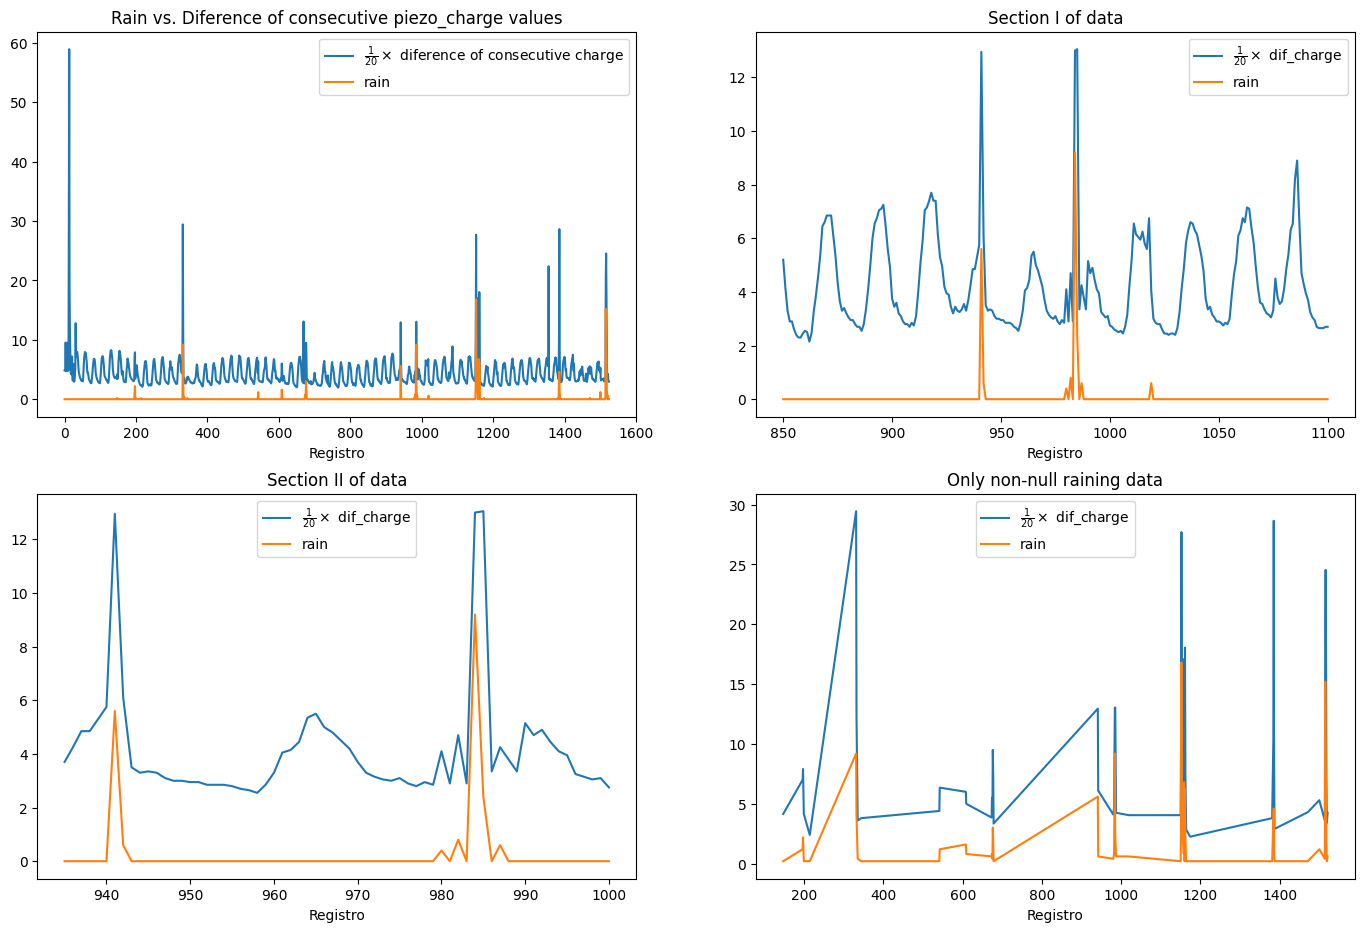

In [24]:
fig, (ax1, ax2) = plt.subplots(2,2,figsize=(17,11))

plt.subplot(221)
ax1[0].plot(dados_df[['dif_charge']]/20, label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1[0].plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(222)
ax1[1].plot(dados_df.loc[850:1100,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax1[1].plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section I of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(223)
ax2[0].plot(dados_df.loc[935:1000,['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[0].plot(dados_df.loc[935:1000,['chuva']], label='rain')
plt.title('Section II of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(224)
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['dif_charge']]/20, label=r'$\frac{1}{20}\times$ dif_charge')
ax2[1].plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [25]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

In [26]:
dados_df['dq/dT'] = (dados_df.dif_charge/dados_df.dif_temp)
#dados_df['dq/dT'] = (np.log(dados_df.dif_charge)/np.log(dados_df.dif_temp)) #testing

In [27]:
pd.concat([dados_df,dados_df['chuva'].diff(1).shift(-1)], axis=1)[[]]

""
0
2
3
4
5
...
1520
1521
1522
1523


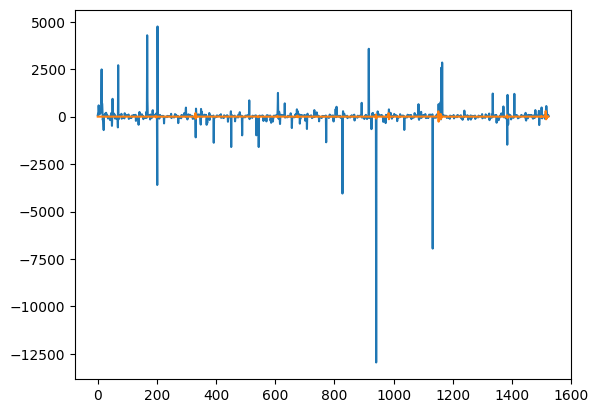

In [28]:
plt.plot(dados_df['dq/dT'])
plt.plot(20*(dados_df['chuva'].diff(1).shift(-1)))

- The rain is also represented by a two-valued variable to separate the non-raining data to these of raining data

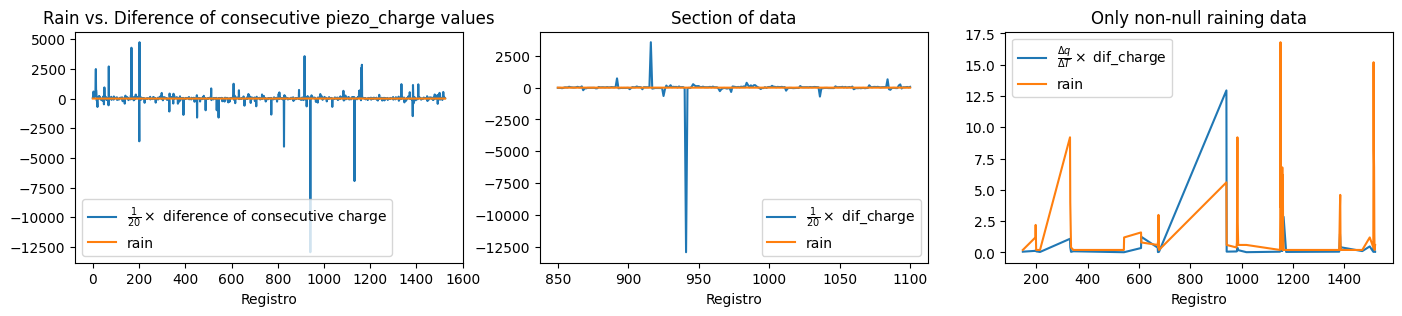

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(17,3))

plt.subplot(131)
ax1.plot(dados_df[['dq/dT']], label=r'$\frac{1}{20}\times$ diference of consecutive charge')
ax1.plot(dados_df[['chuva']], label='rain')
plt.title('Rain vs. Diference of consecutive piezo_charge values')
plt.xlabel('Registro')
plt.legend()

plt.subplot(132)
ax2.plot(dados_df.loc[850:1100,['dq/dT']], label=r'$\frac{1}{20}\times$ dif_charge')
ax2.plot(dados_df.loc[850:1100].chuva, label='rain')
plt.title('Section of data')
plt.xlabel('Registro')
plt.legend()

plt.subplot(133)
ax3.plot(np.abs(dados_df.loc[dados_df.chuva.gt(0),['dq/dT']])/1000, label=r'$\frac{\Delta q}{\Delta T}\times$ dif_charge')
ax3.plot(dados_df.loc[dados_df.chuva.gt(0),['chuva']], label='rain')
plt.title('Only non-null raining data')
plt.xlabel('Registro')
plt.legend()


In [30]:
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1)
#dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<=2.5 else 2 if x<=5 else 3)

In [31]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,dq/dT,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,97.0,1.366,71.010249,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,96.0,0.366,262.295082,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,191.0,0.322,593.167702,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,94.0,0.240,391.666667,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,96.0,0.828,115.942029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,2020-12-03T16:00:00Z,94.0,18.900,9440,3,35492,18,2020-12-03 16:00:00,0.0,70.0,0.900,77.777778,0
1521,2020-12-03T17:00:00Z,90.0,19.700,9420,3,35355,18,2020-12-03 17:00:00,0.6,85.0,1.700,50.000000,1
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,64.0,1.420,45.070423,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,61.0,0.880,69.318182,0


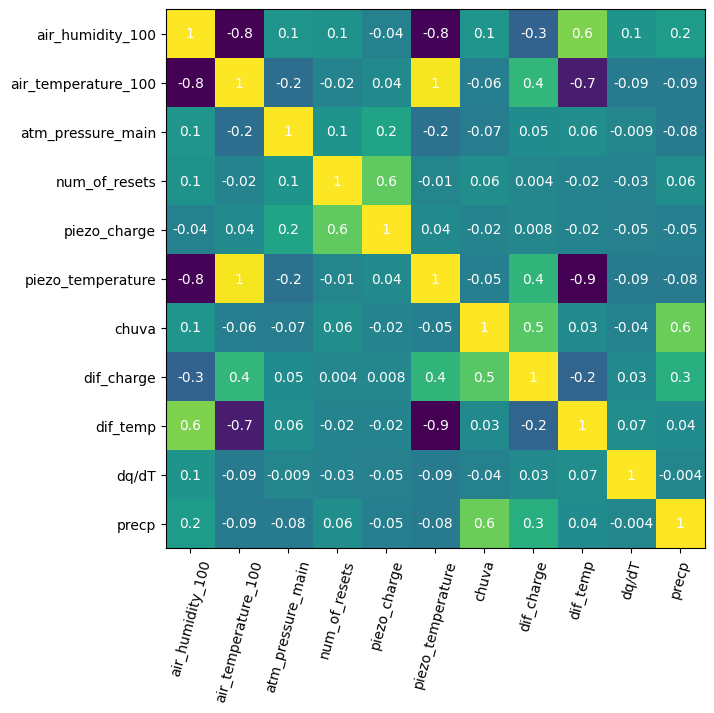

In [32]:
labels = np.array(dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().columns)
heatmap = dados_df.drop(['Datetime – utc', 'data'], axis=1).corr().to_numpy()
n = len(heatmap)

fig, ax = plt.subplots(figsize=(7,7))

ax.imshow(heatmap)

ax.set_yticks(np.arange(n), labels=labels)
ax.set_xticks(np.arange(n), labels=labels, rotation=75)

for l in range(n):
    for k in range(n):
        annot = f'{heatmap[k,l]:.1g}'
        ax.text(k, l, annot, ha='center', va='center', color='w')

#fig.show()


# Calibrator
## Classification
Due to the huge quantity of non raining values a classification model is first fitted.

In [33]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from hyperopt import STATUS_OK, fmin, tpe, hp, Trials

In [34]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [35]:
cols = ['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
        'dif_charge', 'dif_temp', 'dq/dT',
        'precp']

<Axes: >

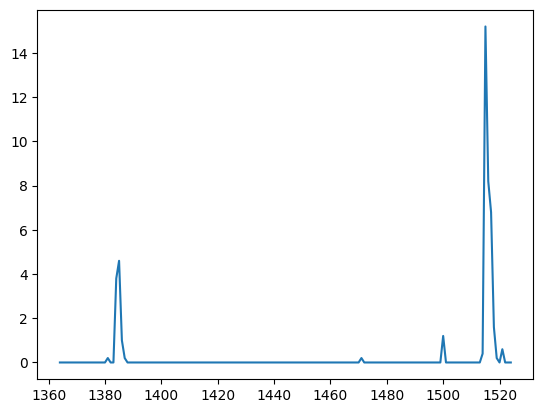

In [36]:
int(dados_df.shape[0]*0.9)
dados_valid_df = dados_df.loc[int(dados_df.shape[0]*0.9):]
dados_valid_df.chuva.plot()

In [37]:
X = dados_df.loc[:int(dados_df.shape[0]*0.9),cols].copy()
y = X.pop('precp')

In [38]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'air_temperature_100',
       'dif_charge', 'dif_temp', 'dq/dT'],
      dtype='object')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
models = {'LogisticRegression':LogisticRegression, 'RandomForestClassifier':RandomForestClassifier, 'XGBClassifier':XGBClassifier}

In [41]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       392
           1       0.67      0.13      0.22        15

    accuracy                           0.97       407
   macro avg       0.82      0.57      0.60       407
weighted avg       0.96      0.97      0.95       407

RandomForestClassifier


c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       392
           1       1.00      0.27      0.42        15

    accuracy                           0.97       407
   macro avg       0.99      0.63      0.70       407
weighted avg       0.97      0.97      0.97       407

XGBClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       0.83      0.33      0.48        15

    accuracy                           0.97       407
   macro avg       0.90      0.67      0.73       407
weighted avg       0.97      0.97      0.97       407



### Bootstrap Regressor

In [42]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [43]:
N = 500

In [44]:
X_bst = pd.concat([X_bst,X_bst[X_bst.precp.eq(1)].sample(n=N, replace=True)])

In [45]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [46]:
for model in models:
    print(model)
    md = models[model]()
    #print(md)
    md.fit(X_train, y_train)
    #print('score: ', md.score(X_train,y_train), md.score(X_test,y_test))
    print(classification_report(y_test, md.predict(X_test)))


LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       392
           1       0.36      0.60      0.45        15

    accuracy                           0.95       407
   macro avg       0.67      0.78      0.71       407
weighted avg       0.96      0.95      0.95       407

RandomForestClassifier


c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       1.00      0.33      0.50        15

    accuracy                           0.98       407
   macro avg       0.99      0.67      0.74       407
weighted avg       0.98      0.98      0.97       407

XGBClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       0.75      0.40      0.52        15

    accuracy                           0.97       407
   macro avg       0.86      0.70      0.75       407
weighted avg       0.97      0.97      0.97       407



In [47]:
best_classifier =  RandomForestClassifier()
best_classifier.fit(X_train,y_train)
print(classification_report(y_test, best_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       392
           1       1.00      0.33      0.50        15

    accuracy                           0.98       407
   macro avg       0.99      0.67      0.74       407
weighted avg       0.98      0.98      0.97       407



## Regressor
- The fine tuning of the model is made with a regression model of the raining data

In [48]:
dados_df.columns

Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'dq/dT',
       'precp'],
      dtype='object')

In [49]:
cols = ['air_humidity_100', 'atm_pressure_main', 
        'piezo_temperature', 
        'dif_charge', 'dif_temp', 'dq/dT',
        'chuva']

In [50]:
X = dados_df.loc[int(dados_df.shape[0]*0.9):, cols].copy()
X = X[X.chuva.gt(0)]
y = X.pop('chuva')

In [51]:
X.columns

Index(['air_humidity_100', 'atm_pressure_main', 'piezo_temperature',
       'dif_charge', 'dif_temp', 'dq/dT'],
      dtype='object')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [53]:
RFNorm = make_pipeline(StandardScaler(),RandomForestRegressor())
SGD = make_pipeline(StandardScaler(),SGDRegressor())

models = {'LinearRregression':LinearRegression(),'Lasso':Lasso(), 'SGD':SGD,
          'RandomForestRegressor':RandomForestRegressor(), 'RandomForestNormalized':RFNorm, 'XGBRegressor':XGBRegressor(),}

In [54]:
for model in models:
    md = models[model]
    cvs = cross_validate(md, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
    print(model + f' cross validation score: {cvs["test_r2"].mean():.2f}')
    md.fit(X_train, y_train)
    print('r2_train:', md.score(X_train, y_train),'r2_train:', md.score(X_test, y_test),'\n')
    #print(cvs['test_r2'])


LinearRregression cross validation score: -19.38
r2_train: 0.879295410847542 r2_train: -4.626869650429844 

Lasso cross validation score: -21.87
r2_train: 0.8675635081960561 r2_train: -3.9907894145289795 

SGD cross validation score: -26.96
r2_train: 0.8642138822488921 r2_train: -3.0815201501280844 

RandomForestRegressor cross validation score: -45.15
r2_train: 0.917988090589614 r2_train: -0.7171287234042587 

RandomForestNormalized cross validation score: -30.32
r2_train: 0.9124913705583761 r2_train: -0.2849096711798873 

XGBRegressor cross validation score: -0.98
r2_train: 0.9999999893451312 r2_train: -1.4682031156673507 



### Hyperparameter optimization

In [55]:

seed = 42
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    score=mean_squared_error(y_test,pred)
    score=-r2_score(y_test,pred)
    return score
    
def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.default_rng(seed))
    return best

trial=Trials()
best_param=optimize(trial)


100%|██████████| 500/500 [02:35<00:00,  3.21trial/s, best loss: -0.8026278501005559]


In [56]:
for a in best_param.items():
    best_param[a[0]] = int(a[1])

best_param

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 348}

In [57]:
#best_param#.score(X_test,y_test), best.score(X_train,y_train)
best_regressor = RandomForestRegressor(**best_param)

In [58]:
best_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=348)

In [59]:
cvs = cross_validate(best_regressor, X=X, y=y, cv=7, scoring=('neg_mean_squared_error','r2'))
print(f'best_regressor: {cvs["test_r2"].mean():.2f}')
print(best_regressor.score(X_train,y_train), best_regressor.score(X_test,y_test))

best_regressor: -17.60
0.6998338688502255 0.6947945115865894


In [60]:
class Rain():
    Classifier = best_classifier
    Regressor = best_regressor
    def __init__(self, x):
        self.x = x.copy()
        
    def transform(self):
        self.x['data'] = pd.to_datetime(self.x['Datetime – utc'], format='mixed')
        self.x['data'] = self.x.data.astype(str).str.split('+',expand=True)[0]
        self.x['dif_charge'] = self.x.groupby('num_of_resets').piezo_charge.diff(-1).shift(-2)
   
        self.x.dropna(inplace=True)

        #dados_df['dif_charge'] = (100*dados_df['dif_charge']/dados_df['piezo_charge'])
        #rms = np.sqrt(self.x.dif_charge.apply(lambda x: x**2).mean())
        #self.x['dif_charge'] = (self.x['dif_charge']-rms)
        
        
        self.x['dif_temp'] = self.x['air_temperature_100'] - self.x['piezo_temperature'].astype(float)
        self.x['dq/dT'] = (self.x.dif_charge/self.x.dif_temp)

    def calculate(self, shft=True):
        self.x['precp'] = self.Classifier.predict(self.x[self.Classifier.feature_names_in_])
        if shft == True:
            self.x['precp'] = self.x['precp'].shift(-1)
        self.x.loc[self.x['precp'].eq(1),'chuva'] = self.Regressor.predict(self.x.loc[self.x['precp'].eq(1), self.Regressor.feature_names_in_])
        self.x.chuva.fillna(0,inplace=True) 
        self.x.dropna(inplace=True)
        

In [61]:
import pickle

In [62]:
with open('../model/Rain.pkl', 'wb') as outp:
    pickle.dump(Rain, outp, pickle.HIGHEST_PROTOCOL)

In [63]:
with open('../model/Rain.pkl', 'rb') as inp:
    rain = pickle.load(inp)

In [64]:
x = sensor_df.dropna().iloc[130:235]

In [65]:
rain = Rain(x)
rain.transform()
rain.Classifier.feature_names_in_,rain.Regressor.feature_names_in_
rain.calculate()
rain.x


,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,dif_charge,dif_temp,dq/dT,precp,chuva
136,2020-10-06T19:00:00Z,20.0,40.380,9393,0,30691,43,2020-10-06 19:00:00,104.0,-2.620,-39.694656,0.0,0.0
137,2020-10-06T20:00:00Z,19.0,40.380,9392,0,30546,42,2020-10-06 20:00:00,91.0,-1.620,-56.172840,0.0,0.0
138,2020-10-06T21:00:00Z,28.0,35.878,9393,0,30415,39,2020-10-06 21:00:00,82.0,-3.122,-26.265215,0.0,0.0
139,2020-10-06T22:00:00Z,32.0,31.820,9397,0,30311,32,2020-10-06 22:00:00,77.0,-0.180,-427.777778,0.0,0.0
140,2020-10-06T23:00:00Z,43.0,28.900,9404,0,30220,28,2020-10-06 23:00:00,75.0,0.900,83.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2020-10-10T19:00:00Z,18.0,30.588,9418,0,22260,37,2020-10-10 19:00:00,72.0,-6.412,-11.228946,0.0,0.0
233,2020-10-10T20:00:00Z,20.0,30.108,9417,0,22148,34,2020-10-10 20:00:00,56.0,-3.892,-14.388489,0.0,0.0
234,2020-10-10T21:00:00Z,24.0,26.748,9422,0,22052,30,2020-10-10 21:00:00,52.0,-3.252,-15.990160,0.0,0.0
235,2020-10-10T22:00:00Z,34.0,21.036,9425,0,21980,23,2020-10-10 22:00:00,49.0,-1.964,-24.949084,0.0,0.0


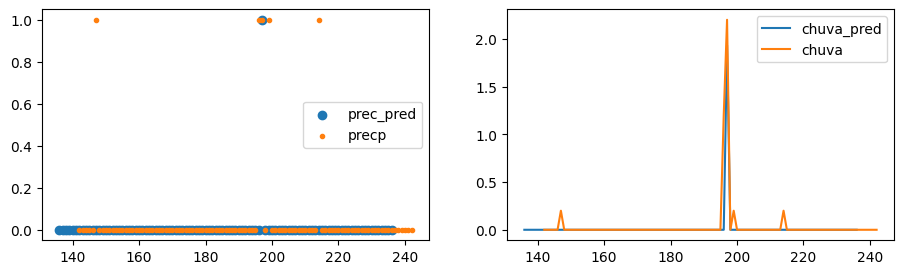

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,3))

plt.subplot(121)
ax1.scatter(rain.x.index, rain.x.precp, label='prec_pred')
ax1.scatter(dados_df.iloc[rain.x.index].index, dados_df.iloc[rain.x.index].precp, label='precp', marker='.')
plt.legend()

plt.subplot(122)
ax2.plot(rain.x.index, rain.x.chuva, label='chuva_pred')
ax2.plot(dados_df.iloc[rain.x.index].index, dados_df.iloc[rain.x.index].chuva, label='chuva')
plt.legend()

In [67]:
print(classification_report(dados_df.loc[rain.x.index].precp, rain.x.precp))
print('Regressor score: ',r2_score(dados_df.loc[rain.x.index].chuva, rain.x.chuva))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        96
           1       1.00      0.20      0.33         5

    accuracy                           0.96       101
   macro avg       0.98      0.60      0.66       101
weighted avg       0.96      0.96      0.95       101

Regressor score:  0.7386426828673218


In [68]:
#dados_valid_df

In [69]:
x = dados_valid_df.copy()

In [70]:
rain = Rain(x)
rain.transform()
rain.Classifier.feature_names_in_,rain.Regressor.feature_names_in_
rain.calculate()
#rain.x


In [71]:
x

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,dq/dT,precp
1364,2020-11-27T04:00:00Z,82.0,21.36,9433,3,50526,21,2020-11-27 04:00:00,0.0,62.0,0.36,172.222222,0
1365,2020-11-27T05:00:00Z,77.0,22.20,9428,3,50462,20,2020-11-27 05:00:00,0.0,62.0,2.20,28.181818,0
1366,2020-11-27T06:00:00Z,74.0,22.30,9428,3,50400,20,2020-11-27 06:00:00,0.0,60.0,2.30,26.086957,0
1367,2020-11-27T07:00:00Z,75.0,21.96,9430,3,50338,20,2020-11-27 07:00:00,0.0,70.0,1.96,35.714286,0
1368,2020-11-27T08:00:00Z,73.0,22.00,9432,3,50276,20,2020-11-27 08:00:00,0.0,79.0,2.00,39.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,2020-12-03T16:00:00Z,94.0,18.90,9440,3,35492,18,2020-12-03 16:00:00,0.0,70.0,0.90,77.777778,0
1521,2020-12-03T17:00:00Z,90.0,19.70,9420,3,35355,18,2020-12-03 17:00:00,0.6,85.0,1.70,50.000000,1
1522,2020-12-03T18:00:00Z,83.0,21.42,9413,3,35287,20,2020-12-03 18:00:00,0.0,64.0,1.42,45.070423,0
1523,2020-12-03T19:00:00Z,86.0,20.88,9412,3,35217,20,2020-12-03 19:00:00,0.0,61.0,0.88,69.318182,0


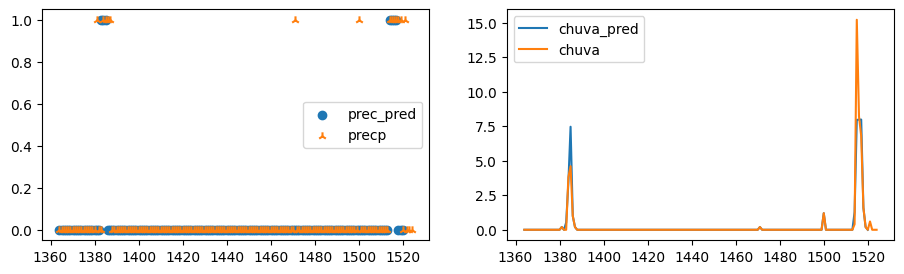

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,3))

plt.subplot(121)
ax1.scatter(rain.x.index, rain.x.precp, label='prec_pred', )
ax1.scatter(x.index, x.precp, label='precp', marker='2')
plt.legend()

plt.subplot(122)
ax2.plot(rain.x.index, rain.x.chuva, label='chuva_pred')
ax2.plot(x.index, x.chuva, label='chuva')
plt.legend()

In [73]:
print(classification_report(dados_df.loc[rain.x.index].precp, rain.x.precp))
print('Regressor score: ',r2_score(dados_df.loc[rain.x.index].chuva, rain.x.chuva))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       144
           1       0.86      0.46      0.60        13

    accuracy                           0.95       157
   macro avg       0.91      0.73      0.79       157
weighted avg       0.95      0.95      0.94       157

Regressor score:  0.8303286296632659
